## Observations and Insights 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_origin_df=pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
mouse_origin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
uniq_mouse_cnt=mouse_origin_df["Mouse ID"].nunique()
print(f"The Number of Mice Included in the Study is:{uniq_mouse_cnt}")

The Number of Mice Included in the Study is:249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# create copy of dataframe to work with
mouse_copy_df=mouse_origin_df.copy()
# return all of the columns from all of the rows that are duplicate rows
dupe_msid_tp=mouse_copy_df[mouse_copy_df.duplicated(["Mouse ID", "Timepoint"])]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(dupe_msid_tp)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_clean_df=mouse_copy_df[mouse_copy_df["Mouse ID"]!="g989"]
mouse_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

# NOTE: Only the duplicate rows were removed to clean the data.  The data for the mouse with duplicates remains and so the number of mice is unchanged 
cln_mouse_cnt=mouse_clean_df["Mouse ID"].nunique()
print(f"The Number of Mice Remaining in the Study is:{cln_mouse_cnt}")

The Number of Mice Remaining in the Study is:248


## Summary Statistics

In [7]:
# Put the drugs into a list
drugs=mouse_clean_df["Drug Regimen"].unique()
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_drugsort_df=mouse_clean_df.sort_values(by=["Drug Regimen"])

# create the tumor volume data by drug list
ram_tumvol=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[0],["Tumor Volume (mm3)"]]
cap_tumvol=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[1],["Tumor Volume (mm3)"]]
inf_tumvol=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[2],["Tumor Volume (mm3)"]]
pla_tumvol=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[3],["Tumor Volume (mm3)"]]
cef_tumvol=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[4],["Tumor Volume (mm3)"]]
ste_tumvol=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[5],["Tumor Volume (mm3)"]]
zon_tumvol=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[6],["Tumor Volume (mm3)"]]
ket_tumvol=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[7],["Tumor Volume (mm3)"]]
pro_tumvol=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[8],["Tumor Volume (mm3)"]]
naf_tumvol=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[9],["Tumor Volume (mm3)"]]

drtv_list=[ram_tumvol, cap_tumvol, inf_tumvol, pla_tumvol, cef_tumvol, ste_tumvol, zon_tumvol, ket_tumvol, pro_tumvol, naf_tumvol]

# Means
mean_list=[]
for drtv in drtv_list:
    mean_list.append(round(drtv.mean(),2))
#Medians
median_list=[]
for drtv in drtv_list:
    median_list.append(round(drtv.median(),2))
#Variance
var_list=[]
for drtv in drtv_list:
    var_list.append(round(drtv.var(),2))
#Standard Deviation
std_list=[]
for drtv in drtv_list:
    std_list.append(round(drtv.std(),2))
#Standard Error of Mean
sem_list=[]
for drtv in drtv_list:
    sem_list.append(round(drtv.sem(),2))


# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_df=pd.DataFrame(drugs)
drug_df.rename(columns={0:"Drug"}, inplace=True)
avetv_df=pd.DataFrame(mean_list)
avetv_df.rename(columns={"Tumor Volume (mm3)":"Mean_TumVol"}, inplace=True)
medtv_df=pd.DataFrame(median_list)
medtv_df.rename(columns={"Tumor Volume (mm3)":"Median_TumVol"}, inplace=True)
vartv_df=pd.DataFrame(var_list)
vartv_df.rename(columns={"Tumor Volume (mm3)":"Var_TumVol"}, inplace=True)
stdtv_df=pd.DataFrame(std_list)
stdtv_df.rename(columns={"Tumor Volume (mm3)":"StanDev_TumVol"}, inplace=True)
semtv_df=pd.DataFrame(sem_list)
semtv_df.rename(columns={"Tumor Volume (mm3)":"SEM_TumVol"}, inplace=True)

tumvol_stats_df=pd.concat([drug_df,avetv_df,medtv_df,vartv_df,stdtv_df,semtv_df], axis=1)
tumvol_stats_df


,Drug,Mean_TumVol,Median_TumVol,Var_TumVol,StanDev_TumVol,SEM_TumVol
0,Ramicane,40.22,40.67,23.49,4.85,0.32
1,Capomulin,40.68,41.56,24.95,4.99,0.33
2,Infubinol,52.88,51.82,43.13,6.57,0.49
3,Placebo,54.03,52.29,61.17,7.82,0.58
4,Ceftamin,52.59,51.78,39.29,6.27,0.47
5,Stelasyn,54.23,52.43,59.45,7.71,0.57
6,Zoniferol,53.24,51.82,48.53,6.97,0.52
7,Ketapril,55.24,53.70,68.55,8.28,0.60
8,Propriva,52.32,50.45,43.85,6.62,0.54
9,Naftisol,54.33,52.51,66.17,8.13,0.60


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

ms_cleangrp=mouse_clean_df.groupby("Drug Regimen")
tum_stats=ms_cleangrp["Tumor Volume (mm3)"].agg(["mean", "median","var", "std", "sem"])
tum_stats

# This method produces everything in a single groupby function


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
mouse_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


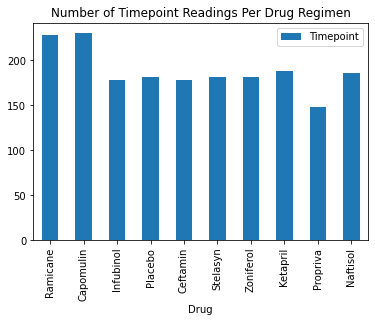

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#Per course instructor change to Readings per Drug Regimen

ram_time=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[0],["Timepoint"]]
cap_time=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[1],["Timepoint"]]
inf_time=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[2],["Timepoint"]]
pla_time=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[3],["Timepoint"]]
cef_time=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[4],["Timepoint"]]
ste_time=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[5],["Timepoint"]]
zon_time=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[6],["Timepoint"]]
ket_time=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[7],["Timepoint"]]
pro_time=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[8],["Timepoint"]]
naf_time=mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == drugs[9],["Timepoint"]]

ram_tpcnt=ram_time.count()
cap_tpcnt=cap_time.count()
inf_tpcnt=inf_time.count()
pla_tpcnt=pla_time.count()
cef_tpcnt=cef_time.count()
ste_tpcnt=ste_time.count()
zon_tpcnt=zon_time.count()
ket_tpcnt=ket_time.count()
pro_tpcnt=pro_time.count()
naf_tpcnt=naf_time.count()

tp_per_dr_list=[ram_tpcnt, cap_tpcnt, inf_tpcnt, pla_tpcnt, cef_tpcnt, ste_tpcnt, zon_tpcnt, ket_tpcnt, pro_tpcnt, naf_tpcnt]

#need to pd.dataframe the drugs list and tp per dr list
#then pd.concat the lists into a df with axis=1
#drug_df
timereg_df=pd.DataFrame(tp_per_dr_list)
plot_df=pd.concat([drug_df,timereg_df],axis=1)
plot_df.plot(kind="bar", x="Drug", title="Number of Timepoint Readings Per Drug Regimen")
plt.show()

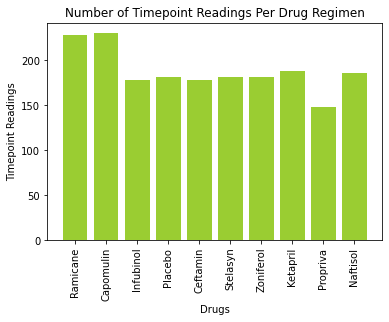

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

tmpt=timereg_df["Timepoint"]

xax=np.arange(0,len(drugs))
tickloc=[]
for x in xax:
    tickloc.append(x)
plt.title("Number of Timepoint Readings Per Drug Regimen")
plt.xlabel("Drugs")
plt.ylabel("Timepoint Readings")
plt.bar(xax,tmpt,facecolor="yellowgreen")
plt.xticks(tickloc,drugs, rotation=90)
plt.show()

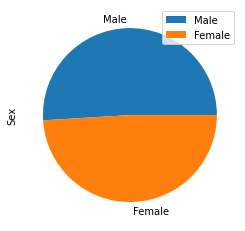

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ms_malsex=mouse_clean_df.loc[mouse_clean_df["Sex"] == "Male",:]
ms_femsex=mouse_clean_df.loc[mouse_clean_df["Sex"] == "Female",:]
malcnt=ms_malsex["Mouse ID"].count()
femcnt=ms_femsex["Mouse ID"].count()
totcnt=mouse_clean_df["Mouse ID"].count()

codetest=pd.DataFrame({"Sex": [malcnt,femcnt]},index=["Male", "Female"])
codetest.plot.pie(y="Sex")
plt.show()


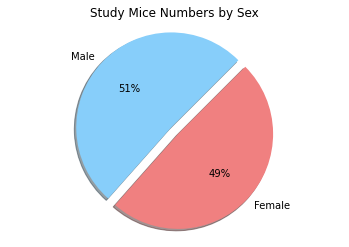

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_sex=["Male","Female"]
micebysex=[malcnt,femcnt]

chart_colors=["lightskyblue", "lightcoral"]
chart_explode=(0,0.1)
plt.title("Study Mice Numbers by Sex")
plt.pie(micebysex,labels=mouse_sex, colors=chart_colors, autopct="%1.0f%%", shadow=True, startangle=45,explode=chart_explode)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
dropindex=mouse_clean_df[(mouse_clean_df["Drug Regimen"]!="Capomulin") & (mouse_clean_df["Drug Regimen"]!="Ramicane") & (mouse_clean_df["Drug Regimen"]!="Infubinol") & (mouse_clean_df["Drug Regimen"]!="Ceftamin")].index
reduce_df=mouse_clean_df.drop(dropindex, inplace=False)

# Start by getting the last (greatest) timepoint for each mouse


# Created 2 dataframes from 2 groupbys.  Originally was tyring to mherge on Mouse ID but Perhaps because one of the groupbys had 2 groupby columns they might both be keys so to get the merge to include all of the columns I had to add the other key (Drug Regimen) to the other dataframe
testa=reduce_df.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].last()
testa_df=pd.DataFrame(testa)
testb=reduce_df.groupby(["Drug Regimen" ,"Mouse ID"])["Tumor Volume (mm3)"].last()
testb_df=pd.DataFrame(testb)
testmerge_df=pd.merge(testb_df,testa_df, on=["Drug Regimen","Mouse ID"], how="inner")
testmerge_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Tumor Volume (mm3)  Timepoint
Drug Regimen Mouse ID                               
Capomulin    b128               38.982878         45
             b742               38.939633         45
             f966               30.485985         20
             g288               37.074024         45
             g316               40.159220         45
...                                   ...        ...
Ramicane     s508               30.276232         45
             u196               40.667713         45
             w678               43.166373          5
             y449               44.183451         15
             z578               30.638696         45

[100 rows x 2 columns]

In [19]:
# Put treatments into a list for for loop (and later for plot labels)

treat_series=reduce_df["Drug Regimen"]
treat_hold=[]
treat_hold =[dr for dr in treat_series if dr not in treat_hold]
treat_set=set(treat_hold)
treat_list=list(treat_set)
# Create empty list to fill with tumor vol data (for plotting)

tumvol_list=[]
tumvol_series=reduce_df["Tumor Volume (mm3)"]
for tv in tumvol_series:
    tumvol_list.append(tv)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
 
tumvol_qrt=tumvol_series.quantile([.25,.5,.75])
lowqrt=round(tumvol_qrt[0.25],2)
upqrt=round(tumvol_qrt[0.75],2)
iqr=round(upqrt-lowqrt,2)
medqrt=round(tumvol_qrt[0.5],2)

print(f"The Lower Quartile for Tumor Volumes is: {lowqrt}")
print(f"The Upper Quartile for Tumor Volumes is: {upqrt}")
print(f"The Lower Interquartile for Tumor Volumes is: {iqr}")
print(f"The Median of Tumor Volumes is: {medqrt}")

low_bnd=round(lowqrt-(1.5*iqr),2)
upbnd=round(upqrt+(1.5*iqr),2)

print(f"Values Below {low_bnd} Are Possible Outliers")
print(f"Values Above {upbnd} Are Possible Outliers")

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The Lower Quartile for Tumor Volumes is: 40.22
The Upper Quartile for Tumor Volumes is: 50.36
The Lower Interquartile for Tumor Volumes is: 10.14
The Median of Tumor Volumes is: 45.0
Values Below 25.01 Are Possible Outliers
Values Above 65.57 Are Possible Outliers


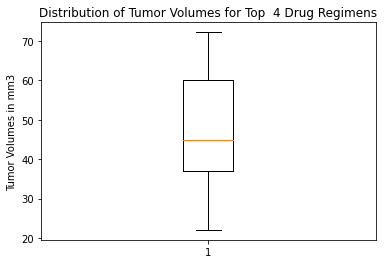

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
bplt_series=testmerge_df["Tumor Volume (mm3)"]
bplt_hold=[]
bplt_hold =[tv for tv in bplt_series if tv not in bplt_hold]
bplt_set=set(bplt_hold)
bplt_list=list(bplt_set)

figa,axs=plt.subplots()
axs.set_title("Distribution of Tumor Volumes for Top  4 Drug Regimens")
axs.set_ylabel("Tumor Volumes in mm3")
axs.boxplot(bplt_list)
plt.show()

## Line and Scatter Plots

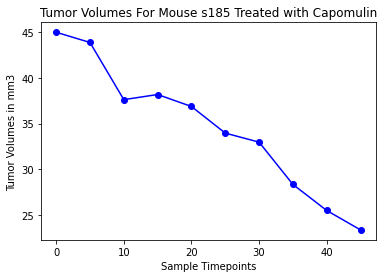

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#new_df =df  df rows where Drug Regimen = Capomulin
#new df2 =df  df rows where Mouse ID =mouse wanted 
#
capo_df=mouse_clean_df[mouse_clean_df["Drug Regimen"]=="Capomulin"]
singmouse_df=capo_df[capo_df["Mouse ID"]=="s185"]
smstp=singmouse_df["Timepoint"]
smstv=singmouse_df["Tumor Volume (mm3)"]
smstp_list=list(smstp)
smstv_list=list(smstv)

plt.title("Tumor Volumes For Mouse s185 Treated with Capomulin")
plt.xlabel("Sample Timepoints")
plt.ylabel("Tumor Volumes in mm3")
plt.plot(smstp_list, smstv_list, marker ="o", color="blue")
plt.show()

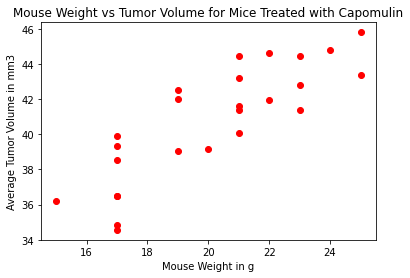

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#new_df =df  df rows where Drug Regimen = Capomulin (from above)
#newgrp=newdf groupby Mouse ID, weight and include tumor volume mm3 .mean()

mswttv_grp=capo_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()
mswttv_df=pd.DataFrame(mswttv_grp)
mswttv_df.rename(columns={"Tumor Volume (mm3)":"Ave Tumor Vol"},inplace=True)
#this reset index line allows me to access the columns from the groupby that would have been indexes and would have given key errors if trying to put in a list
mswttv_df.reset_index(inplace=True)
mswttv_df
wtcol=mswttv_df["Weight (g)"]
wtcol_list=list(wtcol)
atcol=mswttv_df["Ave Tumor Vol"]
atcol_list=list(atcol)

plt.title("Mouse Weight vs Tumor Volume for Mice Treated with Capomulin")
plt.xlabel("Mouse Weight in g")
plt.ylabel("Average Tumor Volume in mm3")
plt.scatter(wtcol_list, atcol_list, marker="o", color="red")
plt.show()

## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
wttv_corr=st.pearsonr(wtcol_list,atcol_list)
wttv_corr
wttv_corr_rnd=round(wttv_corr[0],2)
print (f"The Pearson Correlation Coefficient calculation yields: {wttv_corr}")
print(f"The Correlation Between Mouse Weight and Average Tumor Volume is: {wttv_corr_rnd}")
#mouse wt x, tum vol y

#exact same data as scatter plot

#new_df =df  df rows where Drug Regimen = Capomulin (from above)
#newgrp=newdf groupby Mouse ID, weight and include tumor volume mm3 .mean()

#mouse_clean_df



The Pearson Correlation Coefficient calculation yields: (0.8419363424694717, 1.322572243471279e-07)
The Correlation Between Mouse Weight and Average Tumor Volume is: 0.84


The R Squared Value is: 0.7088568047708717


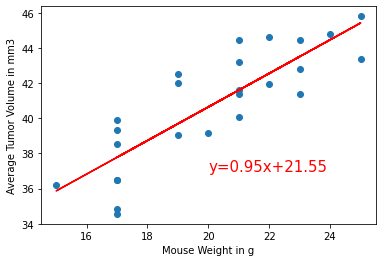

In [54]:
# x=wtcol_list
# y=atcol_list
x_vals=[]
y_vals=[]
for w in wtcol_list:
    x_vals.append(float(w))
for a in atcol_list:
    y_vals.append(float(a))

x=pd.Series(x_vals)
y=pd.Series(y_vals)

(slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
regress_eq=x*slope+intercept
line_eq="y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_eq,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel("Mouse Weight in g")
plt.ylabel("Average Tumor Volume in mm3")
print(f"The R Squared Value is: {rvalue**2}")
plt.show()